In [18]:
%matplotlib inline 

import sys
import os

import numpy as np
import matplotlib.pyplot as plt

f = open("trainingData.txt")
rows = [];
while True:
    row = f.readline()
    if row == "": break
    features = [float(number) if number != 'NA' else -5.0 for number in row.split()]
    rows.append(features)
f.close()

X = np.array(rows)

f = open("trainingTruth.txt")
rows = [];
while True:
    row = f.readline()
    if row == "": break
    rows.append(float(row))
f.close()

Y = np.array(rows)


finished SVD


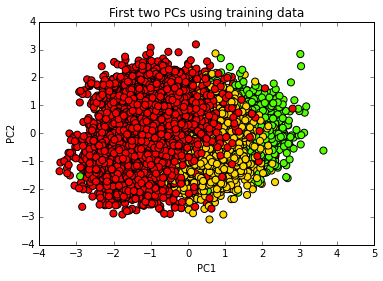

In [19]:
from sklearn import decomposition

svd = decomposition.PCA(n_components=2)
X_centered = X - np.mean(X, axis=0)
X_2d = svd.fit_transform(X_centered)

print ('finished SVD')

plt.scatter(X_2d[:,0], X_2d[:,1], c=Y, s = 50, cmap=plt.cm.prism)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two PCs using training data')
plt.show()


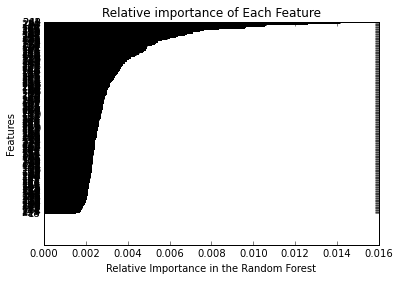

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y,cmap=plt.cm.Paired)
    plt.show()

clf = RandomForestClassifier(n_estimators=15)

clf.fit(X,Y)
importance_list = clf.feature_importances_
name_list = map(str, range(X.shape[1]))
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()


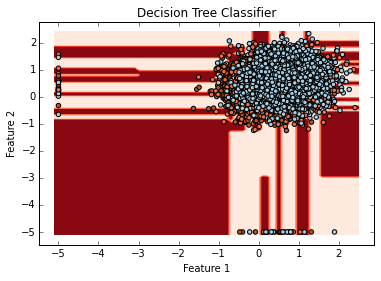

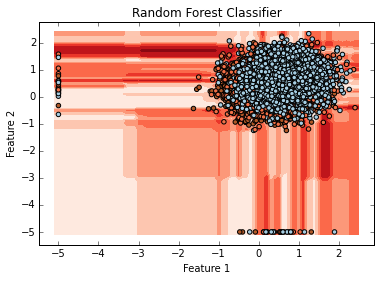

In [21]:
imp_cols = clf.feature_importances_.argsort()[::-1][0:2]
X_imp = X[:,imp_cols]

classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(n_estimators=15)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier']
for c in range(2):
    plt.title(titleClassifer[c])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plot_decision_surface(classifiers[c], X_imp, Y)
